# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/agreement_of_experts/distribution_figures/validation_cohort_kde'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/experiment_metadata/visually_rated_atrophy/discovery_vs_ad_atrophy.csv'
sheet = None

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,subject,Frontal,Temporal,Parietal,Occipital,Cerebellar,Mesial_Temporal,Ventriculomegaly,cerebellar_vermis,cerebellar_fissures,Cohort,Coded_Disease_Status,Disease_Category
0,1,1,0,0,0,0,1,0,0.0,0.0,Discovery,1,CN
1,2,1,1,2,1,1,1,1,1.0,1.0,Discovery,1,CN
2,3,2,2,2,0,1,3,2,0.0,0.0,Discovery,3,AD
3,4,0,1,1,0,0,4,2,0.0,2.0,Discovery,1,CN
4,5,1,0,1,0,0,1,0,0.0,2.0,Discovery,1,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,1,2,1,0,0,4,2,NaN,NaN,Validation,3,AD
96,47,2,2,1,1,0,1,1,NaN,NaN,Validation,3,AD
97,48,1,2,2,1,0,3,1,NaN,NaN,Validation,1,CN
98,49,1,3,2,1,0,3,0,NaN,NaN,Validation,1,CN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar',
       'Mesial_Temporal', 'Ventriculomegaly', 'cerebellar_vermis',
       'cerebellar_fissures', 'Cohort', 'Coded_Disease_Status',
       'Disease_Category'],
      dtype='object')

In [5]:
drop_list = ['Frontal']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Frontal,Temporal,Parietal,Occipital,Cerebellar,Mesial_Temporal,Ventriculomegaly,cerebellar_vermis,cerebellar_fissures,Cohort,Coded_Disease_Status,Disease_Category
0,1,1,0,0,0,0,1,0,0.0,0.0,Discovery,1,CN
1,2,1,1,2,1,1,1,1,1.0,1.0,Discovery,1,CN
2,3,2,2,2,0,1,3,2,0.0,0.0,Discovery,3,AD
3,4,0,1,1,0,0,4,2,0.0,2.0,Discovery,1,CN
4,5,1,0,1,0,0,1,0,0.0,2.0,Discovery,1,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,1,2,1,0,0,4,2,NaN,NaN,Validation,3,AD
96,47,2,2,1,1,0,1,1,NaN,NaN,Validation,3,AD
97,48,1,2,2,1,0,3,1,NaN,NaN,Validation,1,CN
98,49,1,3,2,1,0,3,0,NaN,NaN,Validation,1,CN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar',
       'Mesial_Temporal', 'Ventriculomegaly', 'cerebellar_vermis',
       'cerebellar_fissures', 'Rater', 'Coded_Disease_Status',
       'Disease_Category'],
      dtype='object')

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'BWH' # The value to drop if found

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

KeyError: 'City'

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Compare Distributions Across 2 Categories

In [7]:
data_df.columns

Index(['subject', 'Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar',
       'Mesial_Temporal', 'Ventriculomegaly', 'cerebellar_vermis',
       'cerebellar_fissures', 'Cohort', 'Coded_Disease_Status',
       'Disease_Category'],
      dtype='object')

In [12]:
xlabel = 'Atrophy Grade'
xlim = (0,4)
categories_to_assess_within = ['Mesial_Temporal']
categories_to_assess_across = ['Cohort']

('Discovery', 'Validation') has been Bonferroni corrected by factor 1 from 0.005841778142694731 to 0.005841778142694731


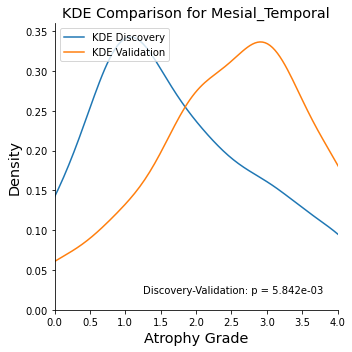

In [13]:
from calvin_utils.statistical_utils.kolmogorov_smirnov import CalvinKolmogorovSmirnovKDE
# Initialize the class
analysis = CalvinKolmogorovSmirnovKDE(xlim, xlabel)

# Orchestrate multiple iterations of t-tests and plot boxplots
all_t_test_results = analysis.orchestrate_ks_tests(data_df, categories_to_assess_within, categories_to_assess_across, outdir=out_dir)